In [27]:
import numpy as np
from qiskit import IBMQ, QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import UnitaryGate
from qiskit.tools.jupyter import *


In [28]:
def phase_oracle(n,mark,name="Oracle"):
    qc=QuantumCircuit(n,name=name)
    oracle_matrix=np.identity(2**n)
    for mark in mark:
        oracle_matrix[mark,mark]=-1
    oracle_gate = UnitaryGate(oracle_matrix)
    qc.append(oracle_gate, range(n))
    return qc

In [29]:
def diffuser(n):
    qc=QuantumCircuit(n,name="Diff-'V'")
    qc.h(range(n))
    qc.append(phase_oracle(n,[0]),range(n))
    qc.h(range(n))
    return qc

def Grover(n,marked):
    qc=QuantumCircuit(n,n)
    r=int(np.round(np.pi/(4*np.arcsin(np.sqrt(len(marked)/2**n)))-1/2))
    print(f'{n} qubits, basis states {marked} marked, {r} rounds')
    qc.h(range(n))
    for _ in range(r):
        qc.append(phase_oracle(n,marked),range(n))
        qc.append(diffuser(n),range(n))
    qc.measure(range(n), range(n))
    return qc

6 qubits, basis states [30] marked, 6 rounds


C:\Users\jairo\anaconda\envs\qiskit-stable\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


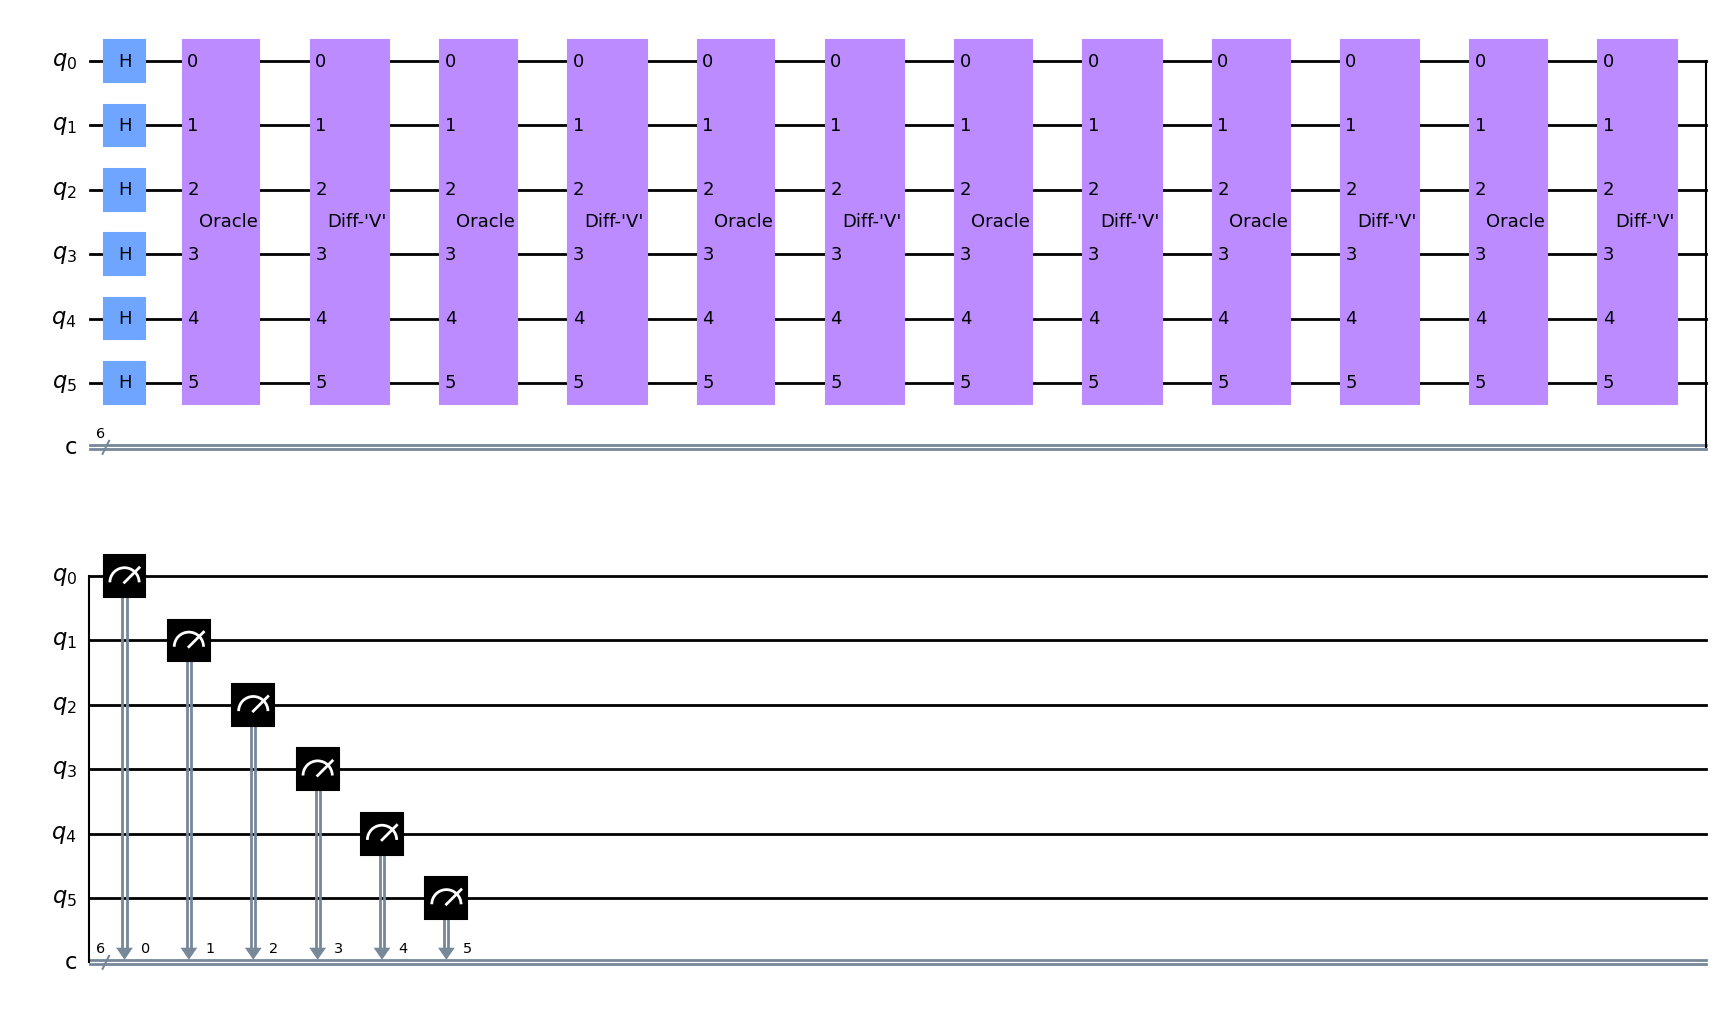

In [36]:
n=6
x=np.random.randint(2**n)
marked=[x]
qc=Grover(n,marked)
qc.draw('mpl')

C:\Users\jairo\AppData\Local\Temp\ipykernel_16456\3876938154.py:2: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  result=execute(qc,backend,shots=1024).result()


{'011110': 1021, '110000': 1, '001000': 1, '101111': 1}
5.766749819872207


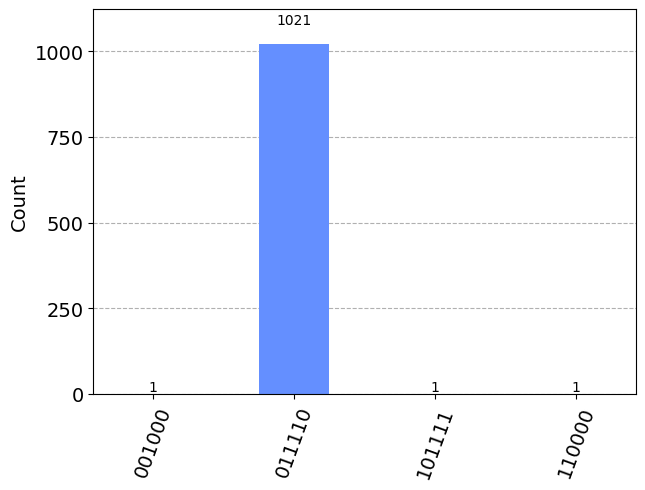

In [37]:
backend=Aer.get_backend('qasm_simulator')
result=execute(qc,backend,shots=1024).result()
count=result.get_counts(qc)
print(count)
print(np.pi/(4*np.arcsin(np.sqrt(len(marked)/2**n)))-1/2)
plot_histogram(count)

ERROR DUE TO ROUNDING UP WHICH IS REQUIRED FOR A 'FOR LOOP'